# Imports and Downloads

In [ ]:
# Global libraries
import pandas as pd
import numpy as np
from scipy.io import arff
import time
import pandas as pd
from numpy import vstack
import random
from matplotlib import pyplot
import matplotlib.pyplot as plt

In [ ]:
# Sklearn - Preprocessa, RF
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [ ]:
pip install arff

  Created wheel for arff: filename=arff-0.9-cp37-none-any.whl size=4970 sha256=deea545785560cc0e1fa457556f07b01e7701f11af7c9793ec10d7dd838a3231
  Stored in directory: /root/.cache/pip/wheels/04/d0/70/2c73afedd3ac25c6085b528742c69b9587cbdfa67e5194583b
Successfully built arff


In [ ]:
# GAN libraries
import arff
from scipy.io.arff import loadarff
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Activation, Flatten, Dropout, LeakyReLU, Dropout, Concatenate, Input, Embedding
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras import Model

In [ ]:
# BB Model libraries
from sklearn.ensemble import RandomForestClassifier

# Question 1

## Data Loading

In [ ]:
# load content from drive
from google.colab import drive
drive.mount('/content/drive', )

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_base_path = '/content/drive/MyDrive/DeepLearningAss4/'

In [ ]:
# load data into dataframe
def load_data(path_arff):
  dataset = arff.loadarff(data_base_path + path_arff)
  data = pd.DataFrame(dataset[0])
  return data

In [ ]:
# Load data_diabetes 
data_diabetes = load_data('diabetes.arff')
data_diabetes

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,b'tested_positive'
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,b'tested_negative'
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,b'tested_positive'
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,b'tested_negative'
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,b'tested_positive'
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,b'tested_negative'
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0,b'tested_negative'
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,b'tested_negative'
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0,b'tested_positive'


In [ ]:
data_diabetes.shape

(768, 9)

In [ ]:
# load data_german_credit
data_german_credit = load_data('german_credit.arff')
data_german_credit

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,b'A11',6.0,b'A34',b'A43',1169.0,b'A65',b'A75',4.0,b'A93',b'A101',4.0,b'A121',67.0,b'A143',b'A152',2.0,b'A173',1.0,b'A192',b'A201',b'1'
1,b'A12',48.0,b'A32',b'A43',5951.0,b'A61',b'A73',2.0,b'A92',b'A101',2.0,b'A121',22.0,b'A143',b'A152',1.0,b'A173',1.0,b'A191',b'A201',b'2'
2,b'A14',12.0,b'A34',b'A46',2096.0,b'A61',b'A74',2.0,b'A93',b'A101',3.0,b'A121',49.0,b'A143',b'A152',1.0,b'A172',2.0,b'A191',b'A201',b'1'
3,b'A11',42.0,b'A32',b'A42',7882.0,b'A61',b'A74',2.0,b'A93',b'A103',4.0,b'A122',45.0,b'A143',b'A153',1.0,b'A173',2.0,b'A191',b'A201',b'1'
4,b'A11',24.0,b'A33',b'A40',4870.0,b'A61',b'A73',3.0,b'A93',b'A101',4.0,b'A124',53.0,b'A143',b'A153',2.0,b'A173',2.0,b'A191',b'A201',b'2'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,b'A14',12.0,b'A32',b'A42',1736.0,b'A61',b'A74',3.0,b'A92',b'A101',4.0,b'A121',31.0,b'A143',b'A152',1.0,b'A172',1.0,b'A191',b'A201',b'1'
996,b'A11',30.0,b'A32',b'A41',3857.0,b'A61',b'A73',4.0,b'A91',b'A101',4.0,b'A122',40.0,b'A143',b'A152',1.0,b'A174',1.0,b'A192',b'A201',b'1'
997,b'A14',12.0,b'A32',b'A43',804.0,b'A61',b'A75',4.0,b'A93',b'A101',4.0,b'A123',38.0,b'A143',b'A152',1.0,b'A173',1.0,b'A191',b'A201',b'1'
998,b'A11',45.0,b'A32',b'A43',1845.0,b'A61',b'A73',4.0,b'A93',b'A101',4.0,b'A124',23.0,b'A143',b'A153',1.0,b'A173',1.0,b'A192',b'A201',b'2'


In [ ]:
data_german_credit.shape

(1000, 21)

In [ ]:
# data german credit data types
data_german_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       1000 non-null   object 
 1   2       1000 non-null   float64
 2   3       1000 non-null   object 
 3   4       1000 non-null   object 
 4   5       1000 non-null   float64
 5   6       1000 non-null   object 
 6   7       1000 non-null   object 
 7   8       1000 non-null   float64
 8   9       1000 non-null   object 
 9   10      1000 non-null   object 
 10  11      1000 non-null   float64
 11  12      1000 non-null   object 
 12  13      1000 non-null   float64
 13  14      1000 non-null   object 
 14  15      1000 non-null   object 
 15  16      1000 non-null   float64
 16  17      1000 non-null   object 
 17  18      1000 non-null   float64
 18  19      1000 non-null   object 
 19  20      1000 non-null   object 
 20  21      1000 non-null   object 
dtypes: float64(7), object(14)
memory usage

## Preprocessing

In [ ]:
# transform categorical columns to one hot vectors
def one_hot_encoding(df):
  return pd.get_dummies(df)

In [ ]:
# transform categorical-ordinal columns to ordinal numbers
def ordinal_encoding(df):
  ord_enc = OrdinalEncoder()
  df_encoded = ord_enc.fit_transform(df)
  return df_encoded, ord_enc

In [ ]:
# scale values between -1 and 1
def scale(df):
  mms = MinMaxScaler(feature_range=(-1,1))
  data_scaled = mms.fit_transform(df)
  return data_scaled, mms

##### Diabetes Data

In [ ]:
# pre process data diabetes data - numerical values only so used only scaling
data_diabetes_scaled, mms_diabetes = scale(data_diabetes.iloc[:,:-1])

##### German Credit Data

In [ ]:
# german credit data - datatypes of columns according to datasets documnetation
categorical = [2,3,8,9,11,13,14,16,18,19]
ordinal = [0,5,6]
numerical = [1,4,7,10,12,15,17]

In [ ]:
data_german_credit_encoded = pd.DataFrame()
# encode categorical features to one hot vectors
data_german_credit_encoded = one_hot_encoding(data_german_credit.iloc[:,categorical])
# encode categorical-ordinal features to numberic
data_german_credit_encoded[ordinal], ord_enc_german = ordinal_encoding(data_german_credit.iloc[:, ordinal])
# scale all values between -1 to 1
data_german_credit_encoded[numerical] = data_german_credit.iloc[:, numerical]
numeric_col = ordinal + numerical
data_german_credit_encoded, mms_german = scale(data_german_credit_encoded)

##### Shuffle & Batch

In [ ]:
# split dataset into batches and shuffle
def shuffle_batch(df):
  dataset = tf.data.Dataset.from_tensor_slices(df)
  train_dataset = dataset.shuffle(len(dataset)).batch(32)
  return train_dataset

In [ ]:
# split datasets to batches and shuffle
train_data_diabetes = shuffle_batch(data_diabetes_scaled)
train_data_german = shuffle_batch(data_german_credit_encoded)

## Diabets Data

#### Hyperparameters

In [ ]:
BATCH_SIZE = 32
EPOCHS = 100
latent_dim = 8

### GAN

https://arxiv.org/pdf/1904.09135.pdf

#### Discriminator

In [ ]:
# build discriminator model
def build_disc(input_shape):
  model = Sequential()
  model.add(Dense(256, input_shape=(input_shape,)))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Dropout(0.2))
  model.add(Dense(512))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Dense(1, activation='sigmoid')) 
	# compile model
  opt = tf.keras.optimizers.Adam(learning_rate=1e-4)
  model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])  
  model.summary()
  return model

#### Generator

In [ ]:
# build generator model
def build_gen(output_shape, noise_shape):
  model = Sequential()
  model.add(Dense(512, input_shape=(noise_shape,)))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Dropout(0.4))
  model.add(Dense(256))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Dense(output_shape, activation='tanh')) 
  model.summary()
  return model

#### Test Discrimnator Model

In [ ]:
# test discriminator without training the generatorto see if it succeeds in the classification task
model_disc = build_disc(8)
model_gen = build_gen(8, latent_dim)
noise = tf.random.normal([128, latent_dim])
X_fake = model_gen.predict(noise)
x, y = vstack((data_diabetes_scaled, X_fake)), vstack((np.ones((data_diabetes_scaled.shape[0],1)), np.zeros((128,1))))
history = model_disc.fit(x, y, epochs = 30) 

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 256)               2304      
_________________________________________________________________
leaky_re_lu_8 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 513       
Total params: 134,401
Trainable params: 134,401
Non-trainable params: 0
________________________________________________

In [ ]:
# evaluate on real data
model_disc.evaluate(data_diabetes_scaled, np.ones((data_diabetes_scaled.shape[0],1)))

24/24 [==============================] - 0s 2ms/step - loss: 0.0015 - accuracy: 1.0000


[0.0014943027636036277, 1.0]

In [ ]:
# evaluate on noise
noise = tf.random.normal([128, latent_dim])
X_fake = model_gen.predict(noise)
model_disc.evaluate(X_fake, np.zeros((128,1)))

4/4 [==============================] - 0s 3ms/step - loss: 0.0124 - accuracy: 1.0000


[0.012430811300873756, 1.0]

### Run Training

##### plot

In [ ]:
# create a line plot of loss for the gan and save to file
def plot_history(d_hist, g_hist, d_acc_hist, adv_acc_hist):
  # plot loss
  pyplot.subplot(2, 1, 1)
  pyplot.plot(d_hist, label='discriminator loss')
  pyplot.plot(g_hist, label='generetor loss')
  pyplot.legend()
  pyplot.title("Discriminator and Generator Loss")
  pyplot.xlabel("steps")
  pyplot.ylabel("loss")
  # plot discriminator accuracy
  pyplot.subplot(2, 1, 2)
  pyplot.plot(d_acc_hist, label='disc_acc')
  pyplot.plot(adv_acc_hist, label='adv_acc')
  pyplot.legend()

#### losses

In [ ]:
# This method returns a helper function to compute cross entropy loss
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=False)

# calcuate the discriminator loss based on https://www.tensorflow.org/tutorials/generative/dcgan
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss, real_loss, fake_loss

# calcuate the generator loss based on https://www.tensorflow.org/tutorials/generative/dcgan
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

In [ ]:
# define optimizers and metrics
generator_optimizer = tf.keras.optimizers.Adam(2*1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(2*1e-4)

disc_accuracy_tracker = tf.keras.metrics.Accuracy(name="disc_accuracy")
adv_accuracy_tracker = tf.keras.metrics.Accuracy(name="adv_accuracy")

In [ ]:
# calculate discriminator loss on real and fake samples separately - while interval is close to 1 and 0
def discriminator_real_loss(real_output):
    real_loss = cross_entropy(tf.random.uniform((real_output.shape[0],1),minval=0.7, maxval=1.2), real_output)
    return real_loss

def discriminator_fake_loss(fake_output):
    fake_loss = cross_entropy(tf.random.uniform((fake_output.shape[0],1),minval=0.0, maxval=0.3), fake_output)
    return fake_loss

#### train

In [ ]:
# This annotation causes the function to be "compiled".
@tf.function
def train_step(records):
    num_sampels = len(records)
    
    noise = tf.random.normal([num_sampels, latent_dim]) # random noise

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape, tf.GradientTape() as disc_fake_tape:  
      generated_records = generator(noise, training=True) # generate samples from noise

      real_output = discriminator(records, training=True) # feed disc with real data
      fake_output = discriminator(generated_records, training=True) # feed disc with fake data
      
      gen_loss = generator_loss(fake_output)  # calculate gen loss on fake data
      total_disc_loss, real_loss, fake_loss  = discriminator_loss(real_output, fake_output) # calculate disc loss on both fake and real data
      real_new_loss = discriminator_real_loss(real_output)  # calculate disc loss on real data
      fake_new_loss = discriminator_fake_loss(fake_output)  # calculate disc loss on fake data

    # caluclate gradients of gen and disc
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator_real = disc_tape.gradient(real_new_loss, discriminator.trainable_variables)
    gradients_of_discriminator_fake = disc_fake_tape.gradient(fake_new_loss, discriminator.trainable_variables)

    # apply gradients to both of the models
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator_real, discriminator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator_fake, discriminator.trainable_variables))

    # round prediction
    rounded_real = tf.math.round(real_output)
    rounded_fake = tf.math.round(fake_output)
    
    # cocatenate disc prediction
    disc_output = tf.concat([rounded_real,rounded_fake], 0)
    disc_real = tf.concat([np.ones((num_sampels, 1)), np.zeros((num_sampels, 1))], axis =0)
    
    # calculate disc accuracy
    disc_accuracy_tracker.update_state(disc_real, disc_output)
    adv_accuracy_tracker.update_state(np.ones((num_sampels, 1)), rounded_fake)

    return total_disc_loss, real_loss, fake_loss, gen_loss, disc_accuracy_tracker.result(), adv_accuracy_tracker.result()


In [ ]:
d_hist, d_r_hist, d_f_hist, g_hist, d_acc_hist, adv_acc_hist = list(), list(), list(), list(), list(), list()
def train(dataset, epochs):
  for epoch in range(epochs):
    for image_batch in dataset:
      d_loss, real_loss, fake_loss, g_loss, d_accuracy, g_accuracy =  train_step(image_batch)
      # record history
      d_hist.append(d_loss.numpy())
      d_r_hist.append(real_loss.numpy())
      d_f_hist.append(fake_loss.numpy())
      g_hist.append(g_loss.numpy())
      d_acc_hist.append(d_accuracy.numpy())
      adv_acc_hist.append(g_accuracy.numpy())
    print('>%d, d_loss=%.3f,d_R_loss=%.3f,d_f_loss=%.3f, g_loss=%.3f, d_acc=%d, aadv_acc=%d' %
			(epoch, d_hist[-1], d_r_hist[-1], d_f_hist[-1],  g_hist[-1], int(100*d_acc_hist[-1]), int(100*adv_acc_hist[-1])))
  
  plot_history(d_r_hist, d_f_hist, d_acc_hist, adv_acc_hist)

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 256)               2304      
_________________________________________________________________
leaky_re_lu_28 (LeakyReLU)   (None, 256)               0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_43 (Dense)             (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_29 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
dense_44 (Dense)             (None, 1)                 513       
Total params: 134,401
Trainable params: 134,401
Non-trainable params: 0
_______________________________________________

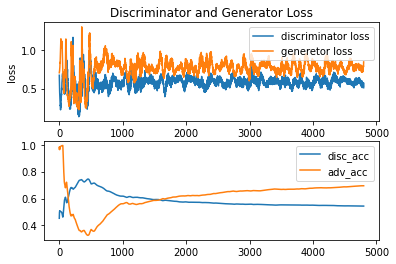

In [ ]:
discriminator = build_disc(8)
generator = build_gen(8, latent_dim)
train(train_data_diabetes, 200)

### Validate Performance Diabetes

#### Evaluate performance

In [ ]:
# evaluate real data accuracy
prediction = tf.math.round(discriminator.predict(train_data_diabetes))
real_acc = tf.keras.metrics.Accuracy()
real_acc.update_state(np.ones(data_diabetes.shape[0]), prediction)
result_real = real_acc.result()
print(f"Real data accuracy: {result_real.numpy()}")

Real data accuracy: 0.8463541865348816


In [ ]:
# evaluate fake data accuracy - 100 samples
num_examples_to_generate = 100
seed = tf.random.normal([num_examples_to_generate, latent_dim])
prediction_gen = generator(seed, training=False)
prediction_disc = discriminator.predict(prediction_gen)
rounded_prediction = tf.math.round(prediction_disc)
fake_acc = tf.keras.metrics.Accuracy()
fake_acc.update_state(np.zeros((num_examples_to_generate,1)), rounded_prediction)
result_fake = fake_acc.result()
print(f"Fake data accuracy: {result_fake.numpy()}")

Fake data accuracy: 0.15000000596046448


In [ ]:
# inverse to real values
predictions_inverse = mms_diabetes.inverse_transform(prediction_gen)
real_data = mms_diabetes.inverse_transform(data_diabetes_scaled)

In [ ]:
# samples which fooled the detector
indices_fooled = [i for i in range(100) if rounded_prediction[i] == 1]
chosen_samples = random.sample(indices_fooled, 5)
for i in chosen_samples:
  distances_scale = []
  for item in data_diabetes_scaled:
    distances_scale.append(np.linalg.norm(prediction_gen[i] - item))
  closest_index = np.argmin(distances_scale)
  print(f"sample number {i}:")
  print(f"Fake sample : {predictions_inverse[i].astype(int)}")
  print(f"Closest real : {real_data[closest_index].astype(int)}")
  print(f"Euclidean Distance: {distances_scale[closest_index]}")

sample number 88:
Fake sample : [10 93 86 15  4 33  0 53]
Closest real : [ 8 99 84  0  0 35  0 50]
Euclidean Distance: 0.4593472182750702
sample number 85:
Fake sample : [  0 140  90  37 231  39   0  21]
Closest real : [  0 127  80  37 210  36   0  23]
Euclidean Distance: 0.30372029542922974
sample number 75:
Fake sample : [ 7 89 42 20 22 27  0 30]
Closest real : [  7 106  60  24   0  26   0  29]
Euclidean Distance: 0.3633643388748169
sample number 57:
Fake sample : [  3 121  74  45 145  37   0  31]
Closest real : [  2 104  80  45 191  33   0  29]
Euclidean Distance: 0.3165197968482971
sample number 66:
Fake sample : [  1 118  79  50 209  39   0  26]
Closest real : [  2 104  80  45 191  33   0  29]
Euclidean Distance: 0.2642476260662079


In [ ]:
# samples which did not fool the detector
indices_not_fooled = [i for i in range(100) if rounded_prediction[i] == 0]
chosen_samples = random.sample(indices_not_fooled, 5)
for i in chosen_samples:
  distances_scale = []
  for item in data_diabetes_scaled:
    distances_scale.append(np.linalg.norm(prediction_gen[i] - item))
  closest_index = np.argmin(distances_scale)
  print(f"sample number {i}:")
  print(f"Fake sample : {predictions_inverse[i].astype(int)}")
  print(f"Closest real : {real_data[closest_index].astype(int)}")
  print(f"Euclidean Distance: {distances_scale[closest_index]}")

sample number 87:
Fake sample : [  3 191 114   5  48  36   0  31]
Closest real : [  4 189 110  31   0  28   0  37]
Euclidean Distance: 0.664002001285553
sample number 60:
Fake sample : [  3 193  99  30 143  32   0  32]
Closest real : [  4 189 110  31   0  28   0  37]
Euclidean Distance: 0.44953539967536926
sample number 4:
Fake sample : [  1 187  90  42 268  35   0  28]
Closest real : [  4 184  78  39 277  37   0  30]
Euclidean Distance: 0.4064830541610718
sample number 16:
Fake sample : [  3 183  84  24 350  29   0  31]
Closest real : [  2 158  70  30 328  35   0  35]
Euclidean Distance: 0.44706934690475464
sample number 3:
Fake sample : [12 96 50  1  0 22  0 41]
Closest real : [13 76 60  0  0 32  0 41]
Euclidean Distance: 0.4179590940475464


In [ ]:
# fooled successfully samples - mean distance
indices_fooled = [i for i in range(100) if rounded_prediction[i] == 1]
closest_distances = []
for i in indices_fooled:
  distances_scale = []
  for item in data_diabetes_scaled:
    distances_scale.append(np.linalg.norm(prediction_gen[i] - item))
  closest_distances.append(min(distances_scale))
print(f"The mean distance of samples which fooled the detector: {np.mean(closest_distances)}")

The mean distance of samples which fooled the detector: 0.3419110178947449


In [ ]:
# Samples which did not fooled - mean distance
indices_not_fooled = [i for i in range(100) if rounded_prediction[i] == 0]
closest_distances = []
for i in indices_not_fooled:
  distances_scale = []
  for item in data_diabetes_scaled:
    distances_scale.append(np.linalg.norm(prediction_gen[i] - item))
  closest_distances.append(min(distances_scale))
print(f"The mean distance of samples which did not fooled the detector: {np.mean(closest_distances)}")

The mean distance of samples which did not fooled the detector: 0.492653489112854


#### Dimensionality Reudction

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(real_data)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
principalDf['target'] = 'real'

In [ ]:
# all fake data
a = pca.transform(predictions_inverse)
b = pd.DataFrame(a, columns=['principal component 1', 'principal component 2'])
b['target'] = 'Fooled'
principalDf = principalDf.append(b, ignore_index=True)
principalDf

In [ ]:
# fake data which did not fool the detector
indices_not_fooled = [i for i in range(100) if rounded_prediction[i] == 0]
index_0 = len(real_data)
for i in indices_not_fooled:
  principalDf["target"].iloc[i+index_0] = 'NotFooled'

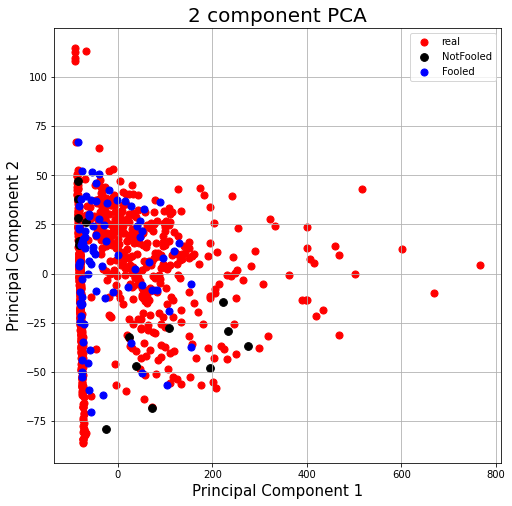

In [ ]:
# plot real and fake data
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['real','NotFooled', 'Fooled']
colors = ['r', 'black', 'b']
for target, color in zip(targets, colors):
    if target =="NotFooled":
      s = 60
    else:
      s=50
    indicesToKeep = principalDf["target"] == target
    ax.scatter(principalDf.loc[indicesToKeep, 'principal component 1']
               , principalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = s)
ax.legend(targets)
ax.grid()

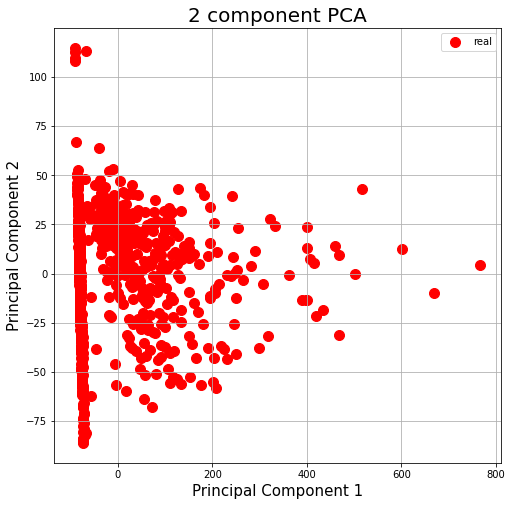

In [ ]:
# plot real data only
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['real']
colors = ['r']
for target, color in zip(targets, colors):
    indicesToKeep = principalDf["target"] == target
    ax.scatter(principalDf.loc[indicesToKeep, 'principal component 1']
               , principalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = s)
ax.legend(targets)
ax.grid()

## German Credit Data

#### Hyperparameters

In [ ]:
BATCH_SIZE = 32
EPOCHS = 100
latent_dim = 20

### GAN

https://arxiv.org/pdf/1904.09135.pdf

#### Discriminator

In [ ]:
# build discriminator model
def build_disc(input_shape):
  model = Sequential()
  model.add(Dense(256, input_shape=(input_shape,)))
  model.add(LeakyReLU())
  model.add(Dropout(0.3))
  model.add(Dense(512))
  model.add(LeakyReLU())
  model.add(Dropout(0.3))
  model.add(Dense(1, activation='sigmoid'))
  opt = tf.keras.optimizers.Adam(learning_rate=1e-4)
  model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])  
  model.summary()
  return model

#### Generator

In [ ]:
# build generator model
def build_gen(output_shape, noise_shape):
  model = Sequential()
  model.add(Dense(512, input_shape=(noise_shape,)))
  model.add(BatchNormalization())
  model.add(LeakyReLU())
  model.add(Dense(256))
  model.add(BatchNormalization())
  model.add(LeakyReLU())
  model.add(Dense(output_shape, activation='tanh')) 
  model.summary()
  return model

### Run Training

###### plot

In [ ]:
# create a line plot of loss for the gan and save to file
def plot_history(d_hist, g_hist, d_acc_hist, adv_acc_hist):
  # plot loss
  pyplot.subplot(2, 1, 1)
  pyplot.plot(d_hist, label='discriminator loss')
  pyplot.plot(g_hist, label='generetor loss')
  pyplot.legend()
  pyplot.title("Discriminator and Generator Loss")
  pyplot.xlabel("steps")
  pyplot.ylabel("loss")
  # plot discriminator accuracy
  pyplot.subplot(2, 1, 2)
  pyplot.plot(d_acc_hist, label='disc_acc')
  pyplot.plot(adv_acc_hist, label='adv_acc')
  pyplot.legend()

##### losses

In [ ]:
# This method returns a helper function to compute cross entropy loss
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=False)

In [ ]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss, real_loss, fake_loss

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

In [ ]:
def discriminator_real_loss(real_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    return real_loss
    
def discriminator_fake_loss(fake_output):
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    return fake_loss

In [ ]:
generator_optimizer = tf.keras.optimizers.Adam(0.0001)
discriminator_optimizer = tf.keras.optimizers.Adam(0.0001)

In [ ]:
disc_accuracy_tracker = tf.keras.metrics.Accuracy(name="disc_accuracy")
disc_accuracy_real_tracker = tf.keras.metrics.Accuracy(name="disc_accuracy_real")
disc_accuracy_fake_tracker = tf.keras.metrics.Accuracy(name="disc_accuracy_fake")
adv_accuracy_tracker = tf.keras.metrics.Accuracy(name="adv_accuracy")

##### train

In [ ]:
# Notice the use of `tf.function`
# This annotation causes the function to be "compiled".
@tf.function
def train_step(records):
    num_sampels = len(records)

    noise = tf.random.normal([num_sampels, latent_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape, tf.GradientTape() as disc_fake_tape, tf.GradientTape() as gen_tape_2:  
      
      generated_records = generator(noise, training=True) # generate samples from noise 
     
      real_output = discriminator(records, training=True) # feed dsic with real data
      fake_output = discriminator(generated_records, training=True)# feed disc with fake data
      
      # Generator train
      gen_loss = generator_loss(fake_output)  # calc gen loss

      #discriminator train
      total_disc_loss, real_loss, fake_loss  = discriminator_loss(real_output, fake_output)
      real_new_loss = discriminator_real_loss(real_output)
      fake_new_loss = discriminator_fake_loss(fake_output)

    # calculate grads
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator_real = disc_tape.gradient(real_new_loss, discriminator.trainable_variables)
    gradients_of_discriminator_fake = disc_fake_tape.gradient(fake_new_loss, discriminator.trainable_variables)
   
    # apply grads
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator_real, discriminator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator_fake, discriminator.trainable_variables))
    
    # evaluate accuracy
    rounded_real = tf.math.round(real_output)
    rounded_fake = tf.math.round(fake_output)

    disc_output = tf.concat([rounded_real, rounded_fake], axis=0)
    disc_real = tf.concat([tf.ones_like(rounded_real), tf.zeros_like(rounded_fake)], axis =0)

    disc_accuracy_tracker.update_state(disc_real, disc_output)
    adv_accuracy_tracker.update_state(tf.ones_like(rounded_fake), rounded_fake)

    disc_accuracy_real_tracker.update_state(tf.ones_like(rounded_real), rounded_real)
    disc_accuracy_fake_tracker.update_state(tf.zeros_like(rounded_fake), rounded_fake)

    return total_disc_loss, real_loss, fake_loss, disc_accuracy_real_tracker.result(), disc_accuracy_fake_tracker.result(), \
    gen_loss, disc_accuracy_tracker.result(), adv_accuracy_tracker.result()

In [ ]:
d_hist, d_r_hist, d_f_hist, g_hist, d_acc_hist, adv_acc_hist, real_acc_hist, fake_acc_hist= list(), list(), list(), list(), list(), list(), list(), list()
def train(dataset, epochs):
  for epoch in range(epochs):
    for image_batch in dataset:
      d_loss, real_loss, fake_loss, real_acc, fake_acc, g_loss, d_accuracy, g_accuracy, =  train_step(image_batch)
      
      # record history
      d_hist.append(d_loss.numpy())
      d_r_hist.append(real_loss.numpy())
      d_f_hist.append(fake_loss.numpy())
      g_hist.append(g_loss.numpy())
      d_acc_hist.append(d_accuracy.numpy())
      adv_acc_hist.append(g_accuracy.numpy())
      real_acc_hist.append(real_acc.numpy())
      fake_acc_hist.append(fake_acc.numpy())

    print('>%d, d_loss=%.3f, d_R_loss=%.3f, d_f_loss=%.3f, real_acc=%d, fake_acc=%d, g_loss=%.3f, d_acc=%d, aadv_acc=%d' %
			(epoch, d_hist[-1], d_r_hist[-1], d_f_hist[-1], int(100*real_acc_hist[-1]), int(100*fake_acc_hist[-1]),\
     g_hist[-1], int(100*d_acc_hist[-1]), int(100*adv_acc_hist[-1])))
  
  plot_history(d_r_hist, d_f_hist, d_acc_hist, adv_acc_hist)

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 256)               13056     
_________________________________________________________________
leaky_re_lu_32 (LeakyReLU)   (None, 256)               0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_49 (Dense)             (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_33 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_50 (Dense)             (None, 1)               

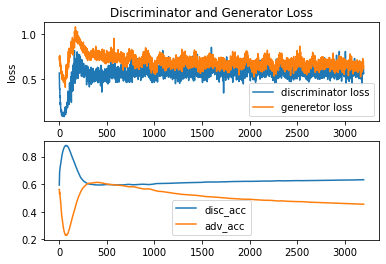

In [ ]:
discriminator = build_disc(50)
generator = build_gen(50, latent_dim)
train(train_data_german, EPOCHS)

### Validate Performance German Credit

#### Evaluate performance

In [ ]:
# evaluate real data accuracy
prediction = tf.math.round(discriminator.predict(train_data_german))
real_acc = tf.keras.metrics.Accuracy()
real_acc.update_state(tf.ones_like(prediction), prediction)
result_real = real_acc.result()
print(f"Real data accuracy: {result_real.numpy()}")

Real data accuracy: 0.7979999780654907


In [ ]:
# evaluate fake data accuracy
num_examples_to_generate = 100
seed = tf.random.normal([num_examples_to_generate, latent_dim])
prediction_gen = generator(seed, training=False)
prediction_disc_1 = discriminator.predict(prediction_gen)
prediction_disc = tf.math.round(prediction_disc_1)
fake_acc = tf.keras.metrics.Accuracy()
fake_acc.update_state(tf.zeros_like(prediction_disc), prediction_disc)
result_fake = fake_acc.result()
print(f"Fake data accuracy: {result_fake.numpy()}")

Fake data accuracy: 0.7099999785423279


In [ ]:
# inverse to real values
predictions_inverse = mms_german.inverse_transform(prediction_gen)
real_data = mms_german.inverse_transform(data_german_credit_encoded)

In [ ]:
# samples which fooled the detector
indices_fooled = [i for i in range(100) if prediction_disc[i] == 1]
chosen_samples = random.sample(indices_fooled, 5)
for i in chosen_samples:
  distances_scale = []
  for item in data_german_credit_encoded:
    distances_scale.append(np.linalg.norm(prediction_gen[i] - item))
  closest_index = np.argmin(distances_scale)
  print(f"sample number {i}:")
  print(f"Fake sample : {predictions_inverse[i].astype(int)}")
  print(f"Closest real : {real_data[closest_index].astype(int)}")
  print(f"Euclidean Distance: {distances_scale[closest_index]}")

sample number 12:
Fake sample : [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   3   3  10 530   3   3  30   1   1]
Closest real : [  0   0   1   0   0   0   0   0   0   1   0   0   0   0   0   0   0   1
   0   1   0   0   1   0   0   0   0   0   1   0   1   0   0   1   0   0
   1   0   1   0   1   2   2  11 766   4   3  66   1   1]
Euclidean Distance: 3.033763885498047
sample number 29:
Fake sample : [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    2
    0   16 2789    1    1   24    1    1]
Closest real : [   0    0    1    0    0    0    0    0    0    1    0    0    0    0
    0    0    0    0    1    1    0    0    1    0    0    0    0    0
    1    0    1    0    0    0    1    0    0    1    1    0   

In [ ]:
# samples which did not fool the detector
indices_not_fooled = [i for i in range(100) if prediction_disc[i] == 0]
chosen_samples = random.sample(indices_not_fooled, 5)
for i in chosen_samples:
  distances_scale = []
  for item in data_german_credit_encoded:
    distances_scale.append(np.linalg.norm(prediction_gen[i] - item))
  closest_index = np.argmin(distances_scale)
  print(f"sample number {i}:")
  print(f"Fake sample : {predictions_inverse[i].astype(int)}")
  print(f"Closest real : {real_data[closest_index].astype(int)}")
  print(f"Euclidean Distance: {distances_scale[closest_index]}")

sample number 17:
Fake sample : [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    1    0
    3   23 1808    2    3   39    3    1]
Closest real : [   0    0    0    0    1    0    0    0    0    1    0    0    0    0
    0    0    0    1    0    1    0    0    0    0    1    0    0    0
    1    0    1    0    0    0    1    0    0    1    1    0    3    0
    4   18 6070    3    4   33    2    1]
Euclidean Distance: 3.698437213897705
sample number 45:
Fake sample : [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    2    3
    3   10 1018    2    3   30    2    1]
Closest real : [   0    0    0    0    1    0    0    0    0    1    0    0    0    0
    0    0    0    1    0    1  

In [ ]:
# fooled successfully samples - mean distance
indices_fooled = [i for i in range(100) if prediction_disc[i] == 1]
closest_distances = []
for i in indices_fooled:
  distances_scale = []
  for item in data_german_credit_encoded:
    distances_scale.append(np.linalg.norm(prediction_gen[i] - item))
  closest_distances.append(min(distances_scale))
print(f"The mean distance of samples which fooled the detector: {np.mean(closest_distances)}")

The mean distance of samples which fooled the detector: 3.4326775074005127


In [ ]:
# Samples which did not fooled - mean distance
indices_not_fooled = [i for i in range(100) if prediction_disc[i] == 0]
closest_distances = []
for i in indices_not_fooled:
  distances_scale = []
  for item in data_german_credit_encoded:
    distances_scale.append(np.linalg.norm(prediction_gen[i] - item))
  closest_distances.append(min(distances_scale))
print(f"The mean distance of samples which did not fooled the detector: {np.mean(closest_distances)}")

The mean distance of samples which did not fooled the detector: 3.432727098464966


#### Dimensionality Reudction

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(real_data)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
principalDf['target'] = 'real'

In [ ]:
# all fake data
a = pca.transform(predictions_inverse)
b = pd.DataFrame(a, columns=['principal component 1', 'principal component 2'])
b['target'] = 'Fooled'
principalDf = principalDf.append(b, ignore_index=True)
principalDf

,principal component 1,principal component 2,target
0,-2102.286066,32.968887,real
1,2679.802872,-17.318299,real
2,-1175.275817,14.446452,real
3,4610.783135,7.120072,real
4,1598.746901,17.170536,real
...,...,...,...
1995,-2641.715750,-11.843569,Fooled
1996,-46.781646,-6.063050,Fooled
1997,-2026.094821,-4.721135,Fooled
1998,-2229.254998,-6.827738,Fooled


In [ ]:
# fake data which did not fool the detector
indices_not_fooled = [i for i in range(100) if prediction_disc[i] == 0]
index_0 = len(real_data)
for i in indices_not_fooled:
  principalDf["target"].iloc[i+index_0] = 'NotFooled'

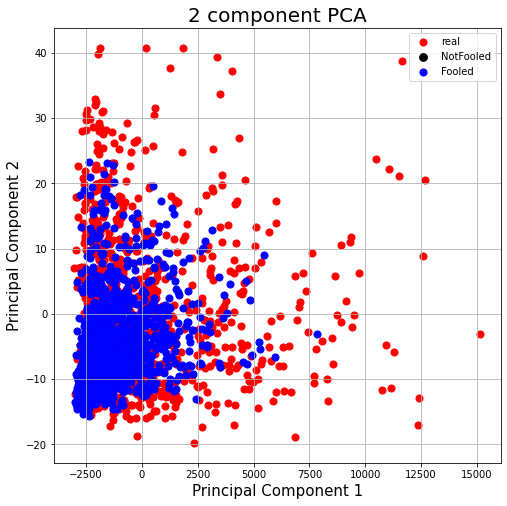

In [ ]:
# plot real and fake data
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['real','NotFooled', 'Fooled']
colors = ['r', 'black', 'b']
for target, color in zip(targets, colors):
    if target =="NotFooled":
      s = 60
    else:
      s=50
    indicesToKeep = principalDf["target"] == target
    ax.scatter(principalDf.loc[indicesToKeep, 'principal component 1']
               , principalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = s)
ax.legend(targets)
ax.grid()

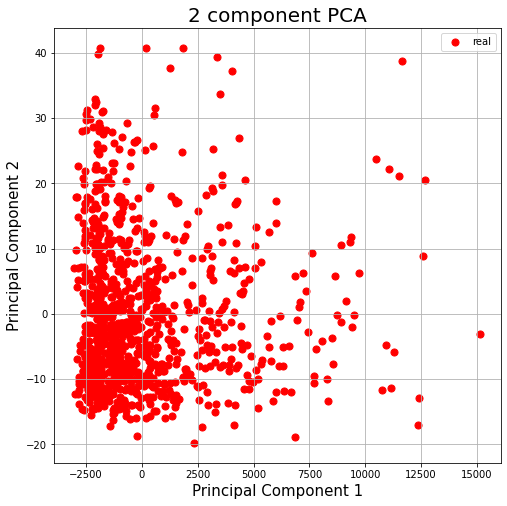

In [ ]:
# plot real data only
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['real']
colors = ['r']
for target, color in zip(targets, colors):
    indicesToKeep = principalDf["target"] == target
    ax.scatter(principalDf.loc[indicesToKeep, 'principal component 1']
               , principalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = s)
ax.legend(targets)
ax.grid()

#Question 2

##Global Functions

In [ ]:
def plot_graphs(a_list, b_list, a_name, b_name, title, x_axis_name, y_axis_name):
  plt.plot(a_list, 'b')
  plt.plot(b_list, 'r')
  plt.legend([a_name, b_name])
  plt.title(title)
  plt.xlabel(x_axis_name)
  plt.ylabel(y_axis_name)
  plt.show()

In [ ]:
def encode_cat_features(df, cat_features_inds):
  # encodes categorical features into a number between 0 and 1, depends on the number of labels in the feature.
  # returns two dictionaries: one for the bins (the intervals of the values) and one for the labels (group_names) of the encoded value
  bins_dict = {}
  group_names_dict = {}
  df = df.copy()
  for cat_feature_ind in cat_features_inds:
    cat_feature = df.iloc[:, cat_feature_ind]
    unique_vals = cat_feature.unique()
    num_unique_vals = len(unique_vals)
    i=0.5
    hops = 1 / num_unique_vals
    bins_dict[cat_feature_ind] = [0]
    group_names_dict[cat_feature_ind] = []
    for val in unique_vals:
      gen_val = round(i * hops, 3)
      cat_feature[cat_feature == val] = gen_val
      bins_dict[cat_feature_ind].append(round((i+0.5)*hops, 3))
      group_names_dict[cat_feature_ind].append(val)
      i+=1
    df.iloc[:, cat_feature_ind] = cat_feature
  
  return df, bins_dict, group_names_dict


In [ ]:
def decode_cat_features(df, bins_dict, group_names_dict):
  df = df.copy()
  for key, val in bins_dict.items():
    df.iloc[:, key] = pd.cut(df.iloc[:, key], bins=bins_dict[key], labels=group_names_dict[key])
  return df

##Load Data

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


###Diabetes Data

In [ ]:

home_path = "drive/MyDrive/Deep Learning Assignment 4"

diabetes_dataset = loadarff(home_path + "/diabetes.arff")
diabetes_data = pd.DataFrame(diabetes_dataset[0])
diabetes_data.loc[diabetes_data["class"] == b'tested_negative', "class"] = 0
diabetes_data.loc[diabetes_data["class"] == b'tested_positive', "class"] = 1

diabetes_class =diabetes_data["class"]
diabetes_data = diabetes_data.drop(columns="class")

display(diabetes_data)
display(diabetes_class)

,preg,plas,pres,skin,insu,mass,pedi,age
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0


0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: class, Length: 768, dtype: object

In [ ]:
# scale the data between 0 and 1

diabetes_scaler = MinMaxScaler()
scaled_diabetes_data = pd.DataFrame(diabetes_scaler.fit_transform(diabetes_data))
display(scaled_diabetes_data)


,0,1,2,3,4,5,6,7
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000
...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333


###German Credit Data

In [ ]:
home_path = "drive/MyDrive/Deep Learning Assignment 4"

german_credit_dataset = loadarff(home_path + "/german_credit.arff")
german_credit_class = pd.DataFrame(german_credit_dataset[0]).iloc[:,-1]
german_credit_data = pd.DataFrame(german_credit_dataset[0]).iloc[:, :-1]
# german_credit_data.loc[german_credit_data["class"] == b'tested_negative', "class"] = 0
# german_credit_data.loc[german_credit_data["class"] == b'tested_positive', "class"] = 1

german_credit_data

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,b'A11',6.0,b'A34',b'A43',1169.0,b'A65',b'A75',4.0,b'A93',b'A101',4.0,b'A121',67.0,b'A143',b'A152',2.0,b'A173',1.0,b'A192',b'A201'
1,b'A12',48.0,b'A32',b'A43',5951.0,b'A61',b'A73',2.0,b'A92',b'A101',2.0,b'A121',22.0,b'A143',b'A152',1.0,b'A173',1.0,b'A191',b'A201'
2,b'A14',12.0,b'A34',b'A46',2096.0,b'A61',b'A74',2.0,b'A93',b'A101',3.0,b'A121',49.0,b'A143',b'A152',1.0,b'A172',2.0,b'A191',b'A201'
3,b'A11',42.0,b'A32',b'A42',7882.0,b'A61',b'A74',2.0,b'A93',b'A103',4.0,b'A122',45.0,b'A143',b'A153',1.0,b'A173',2.0,b'A191',b'A201'
4,b'A11',24.0,b'A33',b'A40',4870.0,b'A61',b'A73',3.0,b'A93',b'A101',4.0,b'A124',53.0,b'A143',b'A153',2.0,b'A173',2.0,b'A191',b'A201'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,b'A14',12.0,b'A32',b'A42',1736.0,b'A61',b'A74',3.0,b'A92',b'A101',4.0,b'A121',31.0,b'A143',b'A152',1.0,b'A172',1.0,b'A191',b'A201'
996,b'A11',30.0,b'A32',b'A41',3857.0,b'A61',b'A73',4.0,b'A91',b'A101',4.0,b'A122',40.0,b'A143',b'A152',1.0,b'A174',1.0,b'A192',b'A201'
997,b'A14',12.0,b'A32',b'A43',804.0,b'A61',b'A75',4.0,b'A93',b'A101',4.0,b'A123',38.0,b'A143',b'A152',1.0,b'A173',1.0,b'A191',b'A201'
998,b'A11',45.0,b'A32',b'A43',1845.0,b'A61',b'A73',4.0,b'A93',b'A101',4.0,b'A124',23.0,b'A143',b'A153',1.0,b'A173',1.0,b'A192',b'A201'


In [ ]:
cat_col_numbers=[0, 2, 3, 5, 6, 8, 9, 11, 13,14,16,18,19]
german_data_encoded, bins_dict, group_names_dict = encode_cat_features(german_credit_data, cat_col_numbers)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
german_data_encoded

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,0.125,6.0,0.1,0.05,1169.0,0.1,0.1,4.0,0.125,0.167,4.0,0.125,67.0,0.167,0.167,2.0,0.125,1.0,0.25,0.25
1,0.375,48.0,0.3,0.05,5951.0,0.3,0.3,2.0,0.375,0.167,2.0,0.125,22.0,0.167,0.167,1.0,0.125,1.0,0.75,0.25
2,0.625,12.0,0.1,0.15,2096.0,0.3,0.5,2.0,0.125,0.167,3.0,0.125,49.0,0.167,0.167,1.0,0.375,2.0,0.75,0.25
3,0.125,42.0,0.3,0.25,7882.0,0.3,0.5,2.0,0.125,0.5,4.0,0.375,45.0,0.167,0.5,1.0,0.125,2.0,0.75,0.25
4,0.125,24.0,0.5,0.35,4870.0,0.3,0.3,3.0,0.125,0.167,4.0,0.625,53.0,0.167,0.5,2.0,0.125,2.0,0.75,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.625,12.0,0.3,0.25,1736.0,0.3,0.5,3.0,0.375,0.167,4.0,0.125,31.0,0.167,0.167,1.0,0.375,1.0,0.75,0.25
996,0.125,30.0,0.3,0.45,3857.0,0.3,0.3,4.0,0.625,0.167,4.0,0.375,40.0,0.167,0.167,1.0,0.625,1.0,0.25,0.25
997,0.625,12.0,0.3,0.05,804.0,0.3,0.1,4.0,0.125,0.167,4.0,0.875,38.0,0.167,0.167,1.0,0.125,1.0,0.75,0.25
998,0.125,45.0,0.3,0.05,1845.0,0.3,0.3,4.0,0.125,0.167,4.0,0.625,23.0,0.167,0.5,1.0,0.125,1.0,0.25,0.25


In [ ]:
scale_cols = [1, 4, 7, 10, 12, 15, 17]

def scale_german_credit_data(german_data, scale_cols = scale_cols):
  german_data_scaler = MinMaxScaler()
  german_data = german_data.copy()
  german_data.iloc[:, scale_cols] = german_data_scaler.fit_transform(german_data.iloc[:, scale_cols])

  return german_data, german_data_scaler

def descale_german_credit_data(german_data_scaled, german_data_scaler, scale_cols=scale_cols):
  german_data_scaled = german_data_scaled.copy()
  german_data_scaled.iloc[:, scale_cols] = german_data_scaler.inverse_transform(german_data_scaled.iloc[:, scale_cols])
  return german_data_scaled

In [ ]:
german_data_scaled, german_data_scaler = scale_german_credit_data(german_data_encoded)

In [ ]:
german_data_descaled = descale_german_credit_data(german_data_scaled, german_data_scaler)

In [ ]:
german_data_descaled

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,0.125,6.0,0.1,0.05,1169.0,0.1,0.1,4.0,0.125,0.167,4.0,0.125,67.0,0.167,0.167,2.0,0.125,1.0,0.25,0.25
1,0.375,48.0,0.3,0.05,5951.0,0.3,0.3,2.0,0.375,0.167,2.0,0.125,22.0,0.167,0.167,1.0,0.125,1.0,0.75,0.25
2,0.625,12.0,0.1,0.15,2096.0,0.3,0.5,2.0,0.125,0.167,3.0,0.125,49.0,0.167,0.167,1.0,0.375,2.0,0.75,0.25
3,0.125,42.0,0.3,0.25,7882.0,0.3,0.5,2.0,0.125,0.5,4.0,0.375,45.0,0.167,0.5,1.0,0.125,2.0,0.75,0.25
4,0.125,24.0,0.5,0.35,4870.0,0.3,0.3,3.0,0.125,0.167,4.0,0.625,53.0,0.167,0.5,2.0,0.125,2.0,0.75,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.625,12.0,0.3,0.25,1736.0,0.3,0.5,3.0,0.375,0.167,4.0,0.125,31.0,0.167,0.167,1.0,0.375,1.0,0.75,0.25
996,0.125,30.0,0.3,0.45,3857.0,0.3,0.3,4.0,0.625,0.167,4.0,0.375,40.0,0.167,0.167,1.0,0.625,1.0,0.25,0.25
997,0.625,12.0,0.3,0.05,804.0,0.3,0.1,4.0,0.125,0.167,4.0,0.875,38.0,0.167,0.167,1.0,0.125,1.0,0.75,0.25
998,0.125,45.0,0.3,0.05,1845.0,0.3,0.3,4.0,0.125,0.167,4.0,0.625,23.0,0.167,0.5,1.0,0.125,1.0,0.25,0.25


In [ ]:
german_data_scaled

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,0.125,0.029412,0.1,0.05,0.050567,0.1,0.1,1.000000,0.125,0.167,1.000000,0.125,0.857143,0.167,0.167,0.333333,0.125,0.0,0.25,0.25
1,0.375,0.647059,0.3,0.05,0.313690,0.3,0.3,0.333333,0.375,0.167,0.333333,0.125,0.053571,0.167,0.167,0.000000,0.125,0.0,0.75,0.25
2,0.625,0.117647,0.1,0.15,0.101574,0.3,0.5,0.333333,0.125,0.167,0.666667,0.125,0.535714,0.167,0.167,0.000000,0.375,1.0,0.75,0.25
3,0.125,0.558824,0.3,0.25,0.419941,0.3,0.5,0.333333,0.125,0.5,1.000000,0.375,0.464286,0.167,0.5,0.000000,0.125,1.0,0.75,0.25
4,0.125,0.294118,0.5,0.35,0.254209,0.3,0.3,0.666667,0.125,0.167,1.000000,0.625,0.607143,0.167,0.5,0.333333,0.125,1.0,0.75,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.625,0.117647,0.3,0.25,0.081765,0.3,0.5,0.666667,0.375,0.167,1.000000,0.125,0.214286,0.167,0.167,0.000000,0.375,0.0,0.75,0.25
996,0.125,0.382353,0.3,0.45,0.198470,0.3,0.3,1.000000,0.625,0.167,1.000000,0.375,0.375000,0.167,0.167,0.000000,0.625,0.0,0.25,0.25
997,0.625,0.117647,0.3,0.05,0.030483,0.3,0.1,1.000000,0.125,0.167,1.000000,0.875,0.339286,0.167,0.167,0.000000,0.125,0.0,0.75,0.25
998,0.125,0.602941,0.3,0.05,0.087763,0.3,0.3,1.000000,0.125,0.167,1.000000,0.625,0.071429,0.167,0.5,0.000000,0.125,0.0,0.25,0.25


In [ ]:
german_data_class = german_credit_class
german_data_class[german_data_class == b'1'] = 0
german_data_class[german_data_class == b'2'] = 1
german_data_class

0      0
1      1
2      0
3      0
4      1
      ..
995    0
996    0
997    0
998    1
999    0
Name: 21, Length: 1000, dtype: object

In [ ]:
german_data_class.sum()

300

##BB GAN

###BB GAN Components

In [ ]:
class BBGAN():
  def __init__(self, data_dim, noise_dim):
    self.data_dim = data_dim
    self.D = None
    self.G = None
    self.AM = None
    self.DM = None

    self.noise_dim = noise_dim

  def discriminator(self, dropout = 0.5):
    # the discriminator here will be trained on a data dimension of data_dim + 2, where the y will be probability that the last vector component holds the true probability (from the BB model)
    if self.D:
      return self.D

    sample_input = Input((self.data_dim,))
    c_input = Input((1,))
    y_input = Input((1,))

    concat_layer = Concatenate()([sample_input, c_input, y_input])

    layer_1 = Dense(256 , activation='relu')(concat_layer)
    layer_1_dropout = Dropout(dropout)(layer_1)

    layer_2 = Dense(256 , activation='relu')(layer_1_dropout)
    layer_2_dropout = Dropout(dropout)(layer_2)

    layer_3 = Dense(128 , activation='relu')(layer_2_dropout)
    layer_3_dropout = Dropout(dropout)(layer_3)

    output = Dense(1, activation = 'sigmoid')(layer_3_dropout)

    self.D = Model(inputs = [sample_input, c_input, y_input], outputs = output)

    print("Discriminator summary")
    self.D.summary()

    return self.D


  def generator(self, dropout=0.5):
    # gets the y input but does nothing with it (just ouputs it)

    if self.G:
      return self.G

    z_input = Input((self.noise_dim,))
    c_input = Input((1,))

    concat_layer = Concatenate()([z_input, c_input])

    layer_1 = Dense(128 , activation='relu')(concat_layer)
    layer_1_dropout = Dropout(dropout)(layer_1)

    layer_2 = Dense(256 , activation='relu')(layer_1_dropout)
    layer_2_dropout = Dropout(dropout)(layer_2)

    layer_3 = Dense(256 , activation='relu')(layer_2_dropout)
    layer_3_dropout = Dropout(dropout)(layer_3)

    output = Dense(self.data_dim, activation = 'sigmoid', name="samples_generator_layer")(layer_3_dropout)

    self.G = Model(inputs=[z_input, c_input], outputs=output)

    print("Generator summary")
    self.G.summary()

    return self.G

  def discriminator_model(self):
    if self.DM:
      return self.DM

    optimizer = Adam()
    self.DM = self.discriminator()
    self.DM.compile(loss='binary_crossentropy', optimizer=optimizer,\
                    metrics=['accuracy'])
    return self.DM


  def adversarial_model(self):
    if self.AM:
      return self.AM

    optimizer = Adam()

    # Adverserial Model
    z_input = Input((self.noise_dim,))
    c_input = Input((1,))
    y_input = Input((1,))
    
    # Generator
    generator = self.generator()([z_input, c_input])
    discriminator = self.discriminator()([generator, c_input, y_input])

    self.AM = Model(inputs = [z_input, c_input, y_input], outputs = discriminator)

    print("Adversarial model summary:")
    self.AM.summary()

    self.AM.compile(loss='binary_crossentropy', optimizer = optimizer, metrics=["accuracy"])

    return self.AM

In [ ]:
class IMPLEMENTED_BBGAN(object):
  def __init__(self, bbmodel, data_dim, noise_dim = 2):
    self.data_dim = data_dim

    self.noise_dim = noise_dim

    self.BBGAN = BBGAN(data_dim=self.data_dim, noise_dim = self.noise_dim)
    self.discriminator =  self.BBGAN.discriminator_model()
    self.adversarial = self.BBGAN.adversarial_model()
    self.generator = self.BBGAN.generator()

    self.bbmodel = bbmodel


  def train(self, train_steps=300, batch_size=256):

    discriminator_accuracies = []
    adversarial_accuracies = []

    discriminator_losses = []
    adversarial_losses = []

    for i in range(train_steps):
      z = np.random.uniform(-1.0, 1.0, size=[batch_size, self.noise_dim])
      c = np.random.uniform(0.0, 1.0, size=[batch_size, 1]) #generated fake confidence

      samples_fake = self.generator([z, c]).numpy()

      y = self.bbmodel.predict_proba(samples_fake)[:,1]

      y_hat = np.ones([batch_size, 1]) # 1 if y has the real value, 0 otherwise

      for ind in range(y_hat.shape[0]):
        rand = random.random()
        # in a probability of 50% - shuffle the components
        if rand >= 0.5:
          temp = c[ind]
          c[ind] = y[ind]
          y[ind] = temp
          y_hat[ind] = 0

      d_loss = self.discriminator.train_on_batch([samples_fake, c, y], y_hat)

      # we need to fool the discriminator by the samples that are generated by the generator, thus we will switch the labels on y_hat (that they will be the opposite)
      for ind_fool in range(len(y_hat)):
        if y_hat[ind_fool] == 0:
          y_hat[ind_fool] = 1
        else:
          y_hat[ind_fool] = 0

      # freeze the discriminator
      self.discriminator.trainable = False
      # train the generator on the fooling data
      a_loss = self.adversarial.train_on_batch([z, c, y], y_hat)
      # un-freeze the discriminator
      self.discriminator.trainable = True

      log_mesg = "%d: [Discriminator loss: %f, acc: %f]" % (i, d_loss[0], d_loss[1])
      log_mesg = "%s  [Adversarial loss: %f, acc: %f]" % (log_mesg, a_loss[0], a_loss[1])
      print(log_mesg)

      discriminator_acc = d_loss[1]
      adversarial_acc = a_loss[1]
      discriminator_loss = d_loss[0]
      adversarial_loss = a_loss[0]

      discriminator_accuracies.append(discriminator_acc)
      adversarial_accuracies.append(adversarial_acc)
      discriminator_losses.append(discriminator_loss)
      adversarial_losses.append(adversarial_loss)
      
    return discriminator_losses, discriminator_accuracies, adversarial_losses, adversarial_accuracies          

  def generate_samples(self, num_samples = 100):
    noise = np.random.uniform(-1.0, 1.0, size=[num_samples, self.BBGAN.noise_dim])
    c = np.random.uniform(0.0, 1.0, size=[num_samples, 1]) #generated fake confidence
    generated_samples = self.generator.predict([noise,c])
    return generated_samples, c






##BB Model

###Diabetes Model

####Split Data

In [ ]:
diabetes_data

,preg,plas,pres,skin,insu,mass,pedi,age
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0


In [ ]:
X = diabetes_data
y = diabetes_class.astype('int')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


####Diabetes Random Forest

In [ ]:
diabetes_rf_clf = RandomForestClassifier()
diabetes_rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
diabetes_confidence = diabetes_rf_clf.predict_proba(X_test)[:, 1]
print(diabetes_confidence)
print(f"max confidence score: {max(diabetes_confidence)}")
print(f"min confidence score: {min(diabetes_confidence)}")
print(f"avg confidence score: {np.mean(diabetes_confidence)}")
diabetes_pred = diabetes_rf_clf.predict(X_test)
print(f"diabetes rf classifier accuracy: {accuracy_score(y_test, diabetes_pred)}")

[0.51 0.2  0.1  0.2  0.55 0.58 0.01 0.7  0.59 0.68 0.33 0.79 0.26 0.42
 0.   0.41 0.06 0.03 0.66 0.4  0.49 0.11 0.32 0.02 0.51 0.87 0.03 0.02
 0.23 0.21 0.77 0.8  0.79 0.82 0.44 0.81 0.78 0.46 0.18 0.74 0.06 0.32
 0.66 0.48 0.05 0.71 0.52 0.1  0.14 0.83 0.   0.74 0.75 0.3  0.12 0.03
 0.71 0.01 0.16 0.82 0.71 0.2  0.27 0.33 0.1  0.7  0.02 0.54 0.05 0.79
 0.73 0.2  0.13 0.05 0.1  0.39 0.23 0.1  0.14 0.19 0.82 0.14 0.19 0.55
 0.19 0.97 0.7  0.38 0.37 0.03 0.01 0.18 0.01 0.62 0.4  0.56 0.65 0.05
 0.74 0.12 0.72 0.1  0.46 0.58 0.86 0.21 0.26 0.89 0.15 0.72 0.01 0.49
 0.14 0.85 0.32 0.36 0.65 0.28 0.02 0.45 0.   0.21 0.38 0.1  0.25 0.5
 0.23 0.83 0.8  0.64 0.67 0.8  0.03 0.44 0.74 0.47 0.32 0.65 0.83 0.
 0.   0.01 0.25 0.56 0.1  0.47 0.3  0.01 0.41 0.8  0.13 0.3  0.44 0.29
 0.02 0.5  0.26 0.45 0.57 0.09 0.41 0.65 0.18 0.   0.07 0.86 0.03 0.33
 0.8  0.72 0.69 0.04 0.63 0.45 0.81 0.13 0.42 0.51 0.4  0.64 0.27 0.42
 0.48 0.77 0.63 0.03 0.08 0.08 0.56 0.57 0.03 0.06 0.74 0.28 0.21 0.04
 0.   0.0

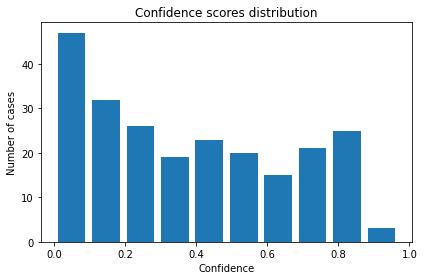

In [ ]:
plt.hist(diabetes_confidence, rwidth=0.8)
plt.xlabel("Confidence")
plt.ylabel("Number of cases")
plt.title("Confidence scores distribution")
plt.tight_layout()
plt.show()

###Diabetes BBModel

In [ ]:
diabetes_bbgan = IMPLEMENTED_BBGAN(diabetes_rf_clf, diabetes_data.shape[1])

Discriminator summary
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 10)           0           input_1[0][0]                    
                                                                 input_2

In [ ]:
discriminator_losses, discriminator_accuracies, adversarial_losses, adversarial_accuracies = diabetes_bbgan.train(train_steps=1500, batch_size=256)

0: [Discriminator loss: 0.704969, acc: 0.480469]  [Adversarial loss: 0.700817, acc: 0.468750]
1: [Discriminator loss: 0.696598, acc: 0.460938]  [Adversarial loss: 0.704232, acc: 0.425781]
2: [Discriminator loss: 0.701345, acc: 0.468750]  [Adversarial loss: 0.703388, acc: 0.460938]
3: [Discriminator loss: 0.702642, acc: 0.437500]  [Adversarial loss: 0.695224, acc: 0.496094]
4: [Discriminator loss: 0.691842, acc: 0.550781]  [Adversarial loss: 0.700650, acc: 0.492188]
5: [Discriminator loss: 0.697925, acc: 0.496094]  [Adversarial loss: 0.703253, acc: 0.468750]
6: [Discriminator loss: 0.697633, acc: 0.476562]  [Adversarial loss: 0.703825, acc: 0.437500]
7: [Discriminator loss: 0.695754, acc: 0.484375]  [Adversarial loss: 0.698877, acc: 0.496094]
8: [Discriminator loss: 0.688302, acc: 0.515625]  [Adversarial loss: 0.698617, acc: 0.468750]
9: [Discriminator loss: 0.690349, acc: 0.503906]  [Adversarial loss: 0.702647, acc: 0.453125]
10: [Discriminator loss: 0.692195, acc: 0.472656]  [Adversar

#### Plot Diabetes BBGAN Graphs

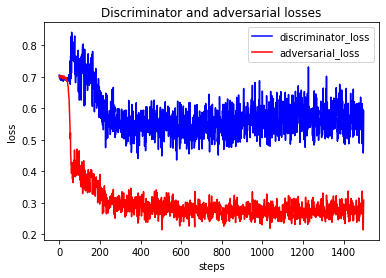

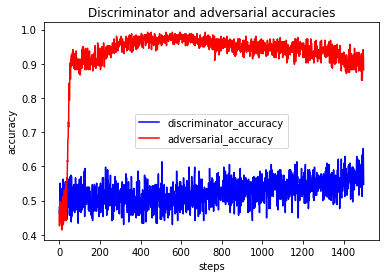

In [ ]:
plot_graphs(discriminator_losses, adversarial_losses, "discriminator_loss", "adversarial_loss", "Discriminator and adversarial losses", "steps", "loss")
plot_graphs(discriminator_accuracies, adversarial_accuracies, "discriminator_accuracy", "adversarial_accuracy", "Discriminator and adversarial accuracies", "steps", "accuracy")

#### Generate Samples

In [ ]:
gen_samples, c = diabetes_bbgan.generate_samples(num_samples=1000)
descaled_gen_samples = diabetes_scaler.inverse_transform(gen_samples)
descaled_gen_samples = pd.DataFrame(descaled_gen_samples)

descaled_gen_samples


,0,1,2,3,4,5,6,7
0,17.0,0.000000e+00,122.0,0.000000e+00,0.000000e+00,0.000000e+00,0.078,21.00000
1,17.0,1.481539e-23,122.0,1.886910e-24,3.253154e-23,2.822176e-25,0.078,21.00000
2,17.0,0.000000e+00,122.0,0.000000e+00,0.000000e+00,0.000000e+00,0.078,21.00000
3,17.0,0.000000e+00,122.0,0.000000e+00,0.000000e+00,0.000000e+00,0.078,21.00000
4,17.0,0.000000e+00,122.0,0.000000e+00,0.000000e+00,0.000000e+00,0.078,21.00000
...,...,...,...,...,...,...,...,...
995,17.0,0.000000e+00,122.0,0.000000e+00,0.000000e+00,0.000000e+00,0.078,21.00000
996,17.0,0.000000e+00,122.0,0.000000e+00,0.000000e+00,0.000000e+00,0.078,21.00000
997,17.0,9.837843e-07,122.0,2.993918e-07,2.874381e-06,1.209741e-07,0.078,21.00001
998,17.0,0.000000e+00,122.0,0.000000e+00,0.000000e+00,0.000000e+00,0.078,21.00000


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponentsOriginal = pca.fit_transform(diabetes_data)
originalPrincipalDf = pd.DataFrame(data = principalComponentsOriginal, columns = ['principal component 1', 'principal component 2'])
principalComponents = pca.transform(descaled_gen_samples)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
principalDf

,principal component 1,principal component 2
0,-91.902520,104.210165
1,-91.902520,104.210165
2,-91.902520,104.210165
3,-91.902520,104.210165
4,-91.902520,104.210165
...,...,...
995,-91.902520,104.210165
996,-91.902520,104.210165
997,-91.902517,104.210163
998,-91.902520,104.210165


In [ ]:
y = diabetes_rf_clf.predict_proba(gen_samples)[:, 1]
y

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.06, 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.05, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.

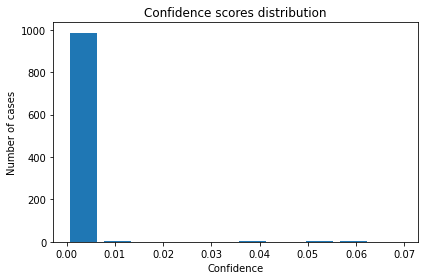

In [ ]:
plt.hist(y, rwidth=0.8)
plt.xlabel("Confidence")
plt.ylabel("Number of cases")
plt.title("Confidence scores distribution")
plt.tight_layout()
plt.show()

In [ ]:
diabetes_rf_clf.predict_proba(diabetes_data)[:, 1]

array([0.91, 0.05, 0.67, 0.  , 0.86, 0.04, 0.03, 0.45, 0.92, 0.64, 0.19,
       0.93, 0.12, 0.86, 0.77, 0.72, 0.89, 0.88, 0.14, 0.8 , 0.12, 0.12,
       0.97, 0.38, 0.67, 0.76, 0.9 , 0.02, 0.27, 0.2 , 0.66, 0.71, 0.02,
       0.05, 0.2 , 0.1 , 0.28, 0.85, 0.66, 0.52, 0.33, 0.81, 0.06, 0.99,
       0.69, 0.93, 0.19, 0.  , 0.81, 0.14, 0.01, 0.02, 0.03, 0.99, 0.73,
       0.01, 0.79, 0.18, 0.33, 0.09, 0.02, 0.87, 0.04, 0.26, 0.9 , 0.37,
       0.46, 0.44, 0.  , 0.33, 0.04, 0.18, 0.46, 0.28, 0.02, 0.  , 0.12,
       0.1 , 0.74, 0.  , 0.05, 0.01, 0.28, 0.  , 0.54, 0.1 , 0.32, 0.01,
       0.77, 0.  , 0.  , 0.17, 0.08, 0.59, 0.08, 0.26, 0.02, 0.01, 0.02,
       0.86, 0.94, 0.25, 0.05, 0.  , 0.05, 0.04, 0.04, 0.13, 0.05, 0.05,
       0.58, 0.93, 0.03, 0.05, 0.94, 0.86, 0.88, 0.08, 0.01, 0.01, 0.77,
       0.08, 0.06, 0.11, 0.67, 0.73, 0.14, 0.03, 0.79, 0.71, 0.92, 0.72,
       0.8 , 0.47, 0.03, 0.42, 0.03, 0.01, 0.23, 0.04, 0.15, 0.2 , 0.02,
       0.83, 0.05, 0.  , 0.08, 0.12, 0.68, 0.01, 0.

###German Credit Model

####Split Data

In [ ]:
german_data_scaled

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,0.125,0.029412,0.1,0.05,0.050567,0.1,0.1,1.000000,0.125,0.167,1.000000,0.125,0.857143,0.167,0.167,0.333333,0.125,0.0,0.25,0.25
1,0.375,0.647059,0.3,0.05,0.313690,0.3,0.3,0.333333,0.375,0.167,0.333333,0.125,0.053571,0.167,0.167,0.000000,0.125,0.0,0.75,0.25
2,0.625,0.117647,0.1,0.15,0.101574,0.3,0.5,0.333333,0.125,0.167,0.666667,0.125,0.535714,0.167,0.167,0.000000,0.375,1.0,0.75,0.25
3,0.125,0.558824,0.3,0.25,0.419941,0.3,0.5,0.333333,0.125,0.5,1.000000,0.375,0.464286,0.167,0.5,0.000000,0.125,1.0,0.75,0.25
4,0.125,0.294118,0.5,0.35,0.254209,0.3,0.3,0.666667,0.125,0.167,1.000000,0.625,0.607143,0.167,0.5,0.333333,0.125,1.0,0.75,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.625,0.117647,0.3,0.25,0.081765,0.3,0.5,0.666667,0.375,0.167,1.000000,0.125,0.214286,0.167,0.167,0.000000,0.375,0.0,0.75,0.25
996,0.125,0.382353,0.3,0.45,0.198470,0.3,0.3,1.000000,0.625,0.167,1.000000,0.375,0.375000,0.167,0.167,0.000000,0.625,0.0,0.25,0.25
997,0.625,0.117647,0.3,0.05,0.030483,0.3,0.1,1.000000,0.125,0.167,1.000000,0.875,0.339286,0.167,0.167,0.000000,0.125,0.0,0.75,0.25
998,0.125,0.602941,0.3,0.05,0.087763,0.3,0.3,1.000000,0.125,0.167,1.000000,0.625,0.071429,0.167,0.5,0.000000,0.125,0.0,0.25,0.25


In [ ]:
X = german_data_scaled
y = german_data_class.astype('int')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


####German Credit Random Forest

In [ ]:
german_credit_rf_clf = RandomForestClassifier()
german_credit_rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
german_credit_confidence = german_credit_rf_clf.predict_proba(X_test)[:, 1]
print(german_credit_confidence)

print(f"max confidence score: {max(german_credit_confidence)}")
print(f"min confidence score: {min(german_credit_confidence)}")
print(f"avg confidence score: {np.mean(german_credit_confidence)}")
german_credit_pred = german_credit_rf_clf.predict(X_test)
print(f"german credit rf classifier accuracy: {accuracy_score(y_test, german_credit_pred)}")


german_credit_pred = german_credit_rf_clf.predict(X_test)
print(f"accuracy: {accuracy_score(y_test, german_credit_pred)}")

[0.26 0.51 0.73 0.22 0.09 0.36 0.06 0.37 0.2  0.29 0.08 0.63 0.15 0.79
 0.7  0.42 0.16 0.08 0.41 0.25 0.24 0.41 0.05 0.01 0.04 0.47 0.54 0.45
 0.39 0.08 0.34 0.12 0.4  0.13 0.13 0.25 0.59 0.11 0.09 0.62 0.4  0.04
 0.34 0.08 0.14 0.31 0.43 0.46 0.31 0.31 0.55 0.14 0.43 0.52 0.15 0.27
 0.09 0.6  0.63 0.2  0.29 0.63 0.37 0.08 0.38 0.32 0.02 0.4  0.38 0.15
 0.32 0.11 0.17 0.43 0.29 0.65 0.34 0.31 0.14 0.48 0.15 0.22 0.02 0.4
 0.09 0.42 0.72 0.67 0.21 0.13 0.33 0.04 0.82 0.37 0.1  0.21 0.11 0.49
 0.7  0.32 0.02 0.36 0.15 0.02 0.23 0.42 0.35 0.42 0.15 0.61 0.77 0.2
 0.33 0.11 0.39 0.21 0.35 0.12 0.21 0.41 0.26 0.51 0.33 0.23 0.42 0.21
 0.55 0.15 0.2  0.14 0.16 0.19 0.21 0.13 0.4  0.31 0.45 0.12 0.2  0.26
 0.66 0.46 0.69 0.02 0.37 0.56 0.43 0.32 0.39 0.65 0.14 0.22 0.19 0.25
 0.1  0.4  0.38 0.13 0.36 0.31 0.51 0.21 0.51 0.68 0.37 0.18 0.06 0.32
 0.16 0.49 0.06 0.25 0.29 0.26 0.04 0.3  0.37 0.07 0.33 0.6  0.13 0.07
 0.17 0.09 0.16 0.05 0.56 0.04 0.27 0.07 0.23 0.59 0.45 0.38 0.23 0.06
 0.62 0.

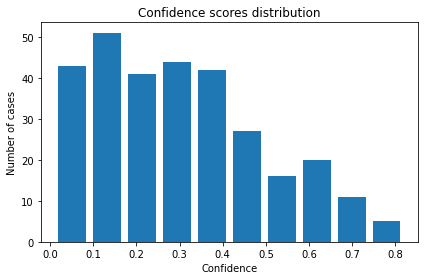

In [ ]:
plt.hist(german_credit_confidence, rwidth=0.8)
plt.xlabel("Confidence")
plt.ylabel("Number of cases")
plt.title("Confidence scores distribution")
plt.tight_layout()
plt.show()

####German Credit BBGAN

In [ ]:
german_credit_bbgan = IMPLEMENTED_BBGAN(german_credit_rf_clf, german_data_scaled.shape[1], noise_dim=3)

Discriminator summary
Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_17 (InputLayer)           [(None, 20)]         0                                            
__________________________________________________________________________________________________
input_18 (InputLayer)           [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_19 (InputLayer)           [(None, 1)]          0                                            
__________________________________________________________________________________________________
concatenate_4 (Concatenate)     (None, 22)           0           input_17[0][0]                   
                                                                 input

In [ ]:
discriminator_losses, discriminator_accuracies, adversarial_losses, adversarial_accuracies = german_credit_bbgan.train(train_steps=2500, batch_size=256)

0: [Discriminator loss: 0.724775, acc: 0.492188]  [Adversarial loss: 0.713363, acc: 0.503906]
1: [Discriminator loss: 0.714851, acc: 0.496094]  [Adversarial loss: 0.699184, acc: 0.496094]
2: [Discriminator loss: 0.713965, acc: 0.445312]  [Adversarial loss: 0.703431, acc: 0.480469]
3: [Discriminator loss: 0.701836, acc: 0.476562]  [Adversarial loss: 0.707356, acc: 0.460938]
4: [Discriminator loss: 0.693450, acc: 0.527344]  [Adversarial loss: 0.695158, acc: 0.496094]
5: [Discriminator loss: 0.695526, acc: 0.519531]  [Adversarial loss: 0.691543, acc: 0.519531]
6: [Discriminator loss: 0.693185, acc: 0.531250]  [Adversarial loss: 0.706708, acc: 0.507812]
7: [Discriminator loss: 0.696763, acc: 0.503906]  [Adversarial loss: 0.697774, acc: 0.507812]
8: [Discriminator loss: 0.702942, acc: 0.441406]  [Adversarial loss: 0.694603, acc: 0.503906]
9: [Discriminator loss: 0.695849, acc: 0.562500]  [Adversarial loss: 0.709989, acc: 0.421875]
10: [Discriminator loss: 0.693338, acc: 0.492188]  [Adversar

KeyboardInterrupt: ignored

####Plot German Credit BBGAN Graphs

In [ ]:
plot_graphs(discriminator_losses, adversarial_losses, "discriminator_loss", "adversarial_loss", "Discriminator and adversarial losses", "steps", "loss")
plot_graphs(discriminator_accuracies, adversarial_accuracies, "discriminator_accuracy", "adversarial_accuracy", "Discriminator and adversarial accuracies", "steps", "accuracy")

####Generate Samples

In [ ]:
gen_samples, c = german_credit_bbgan.generate_samples(num_samples=1000)
gen_samples = pd.DataFrame(gen_samples)
descaled_gen_samples = descale_german_credit_data(gen_samples, german_data_scaler)
descaled_gen_samples = pd.DataFrame(descaled_gen_samples)
decoded_descaled_gen_samples = decode_cat_features(descaled_gen_samples, bins_dict, group_names_dict)

decoded_descaled_gen_samples


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,b'A11',4.000306,b'A34',b'A43',251.029480,b'A65',b'A75',1.000234,b'A93',b'A101',1.000054,b'A121',19.000454,b'A143',b'A152',1.000413,b'A171',1.000071,b'A192',b'A201'
1,b'A11',4.000001,b'A34',b'A43',250.011444,b'A65',b'A75',1.000000,b'A93',b'A101',1.000000,b'A121',19.000002,b'A143',b'A152',1.000003,b'A171',1.000001,b'A192',b'A201'
2,b'A11',4.000000,b'A34',b'A43',250.000412,b'A65',b'A75',1.000000,b'A93',b'A101',1.000000,b'A121',19.000000,b'A143',b'A152',1.000000,b'A171',1.000000,b'A192',b'A201'
3,b'A11',4.000000,b'A34',b'A43',250.000061,b'A65',b'A75',1.000000,b'A93',b'A101',1.000000,b'A121',19.000000,b'A143',b'A152',1.000000,b'A171',1.000000,b'A192',b'A201'
4,NaN,4.000000,b'A31',NaN,250.000000,NaN,NaN,4.000000,NaN,NaN,1.000000,NaN,19.000000,b'A142',NaN,1.000000,NaN,1.000000,NaN,b'A202'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,b'A11',4.002503,b'A34',b'A43',255.558731,b'A65',b'A75',1.002426,b'A93',b'A101',1.000348,b'A121',19.003376,b'A143',b'A152',1.002306,b'A171',1.000381,b'A192',b'A201'
996,b'A11',4.000007,b'A34',b'A43',250.049408,b'A65',b'A75',1.000002,b'A93',b'A101',1.000002,b'A121',19.000013,b'A143',b'A152',1.000014,b'A171',1.000003,b'A192',b'A201'
997,NaN,4.000000,b'A31',NaN,250.000000,NaN,NaN,4.000000,NaN,NaN,1.000000,NaN,19.000000,b'A142',NaN,1.000000,NaN,1.000000,NaN,b'A202'
998,NaN,4.000000,b'A31',NaN,250.000000,NaN,b'A75',4.000000,NaN,NaN,1.000000,NaN,19.000000,b'A142',NaN,1.000000,b'A173',1.000000,NaN,b'A202'


In [ ]:
y = german_credit_rf_clf.predict_proba(descaled_gen_samples)[:, 1]


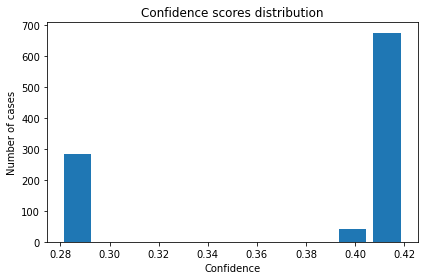

In [ ]:
plt.hist(y, rwidth=0.8)
plt.xlabel("Confidence")
plt.ylabel("Number of cases")
plt.title("Confidence scores distribution")
plt.tight_layout()
plt.show()